In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
all_data = pd.read_csv('all_in_one_three.csv')
all_data.drop(['Unnamed: 0'],axis = 1,inplace = True)
all_data.head(n=5)

,city,people,date,year,mon,day,SO2,O3,NO2,PM10,...,rain -3,wind -1,wind -2,wind -3,humid -1,humid -2,humid -3,diff temp -1,diff temp -2,diff temp -3
0,강원,10.253465,2014-01-01,2014,1,1,0.009136,0.023676,0.014603,111.246212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,강원,82.027723,2014-01-02,2014,1,2,0.007581,0.018956,0.016050,50.683712,...,NaN,4.35,NaN,NaN,31.95,NaN,NaN,5.4,NaN,NaN
2,강원,71.774257,2014-01-03,2014,1,3,0.009411,0.015014,0.023754,62.465530,...,NaN,2.10,4.35,NaN,28.75,31.95,NaN,7.7,5.4,NaN
3,강원,47.849505,2014-01-04,2014,1,4,0.006177,0.013977,0.019977,58.992424,...,1.0,3.10,2.10,4.35,34.95,28.75,31.95,7.9,7.7,5.4
4,강원,13.671287,2014-01-05,2014,1,5,0.006097,0.014955,0.018314,45.530303,...,0.0,1.55,3.10,2.10,86.40,34.95,28.75,3.2,7.9,7.7


In [3]:
def holi_filter(data, month, day):
    is_month = data['mon'] != month
    is_day = data['day'] != day
    is_not_holi = data[is_day | is_month]
    
    return is_not_holi

In [4]:
def rescale_monday(df):
    if df['day name'] == 'Monday':
        return df['people'] * 0.74
    else:
        return df['people']

In [5]:
# 주말, 공휴일 제거
day_name_mask = (all_data['day name'] != 'Sunday')
all_data = all_data[day_name_mask]
holi_list = [[1,1],[1,2],[3,1],[3,2],[5,5],[5,6],[6,6],[6,7],[8,15],[8,16],[10,3],[10,4],[10,9],[10,10],[12,25],[12,26]]
for i in holi_list:
    all_data = holi_filter(all_data, i[0], i[1])

# 월요일 *0.74
all_data['people'] = all_data.apply(rescale_monday,axis = 1) 
    
# 날짜, 사람수만 가져오기
all_data_people = all_data[['people','date']]
print('all data count = ', len(all_data_people))

#round
all_data_people['people'] = all_data_people['people'].round(0).astype(int)

#count
all_data_people_group = all_data_people.groupby(['people']).count().reset_index()
print('date sum = ', all_data_people_group['date'].sum())
    
all_data_people_group.head(n=30)

all data count =  23884
date sum =  23884


D:\anaconda3\envs\data\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,people,date
0,1,5
1,2,12
2,3,29
3,4,13
4,5,15
5,6,11
6,7,12
7,8,7
8,9,9
9,10,15


<AxesSubplot:xlabel='people', ylabel='date'>

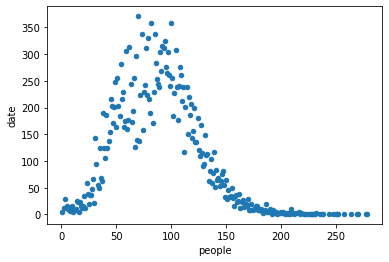

In [6]:
all_data_people_group.plot.scatter(x='people', y='date')

In [7]:
q25 = all_data_people['people'].quantile(.25)
q50 = all_data_people['people'].quantile(.5)
q75 = all_data_people['people'].quantile(.75)
q100 = all_data_people['people'].quantile(1)

print('25% = ',q25)
print('50% = ',q50)
print('75% = ',q75)
print('100% = ',q100)

25% =  62.0
50% =  87.0
75% =  109.0
100% =  278.0
